# bank data from signate
## [data](https://signate.jp/competitions/1)

In [36]:
%matplotlib inline
import matplotlib.pyplot  as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

In [2]:
#load training data
train = pd.read_csv('data/1/train.csv')
train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown,1
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success,1


In [3]:
train.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000
mean,13564.500000,40.951010,1355.800870,15.806215,260.711295,2.751769,40.528052,0.579733,0.117001
std,7831.323388,10.608542,3003.305272,8.337904,260.091727,3.126594,100.382462,2.503653,0.321427
min,1.000000,18.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,6782.750000,33.000000,72.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,13564.500000,39.000000,449.000000,16.000000,182.000000,2.000000,-1.000000,0.000000,0.000000
75%,20346.250000,48.000000,1428.000000,21.000000,323.000000,3.000000,-1.000000,0.000000,0.000000
max,27128.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [4]:
#load test data
test = pd.read_csv('data/1/test.csv')
test.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,30,management,single,tertiary,no,1028,no,no,cellular,4,feb,1294,2,-1,0,unknown
1,2,39,self-employed,single,tertiary,no,426,no,no,unknown,18,jun,1029,1,-1,0,unknown
2,3,38,technician,single,tertiary,no,-572,yes,yes,unknown,5,jun,26,24,-1,0,unknown
3,4,34,technician,single,secondary,no,-476,yes,no,unknown,27,may,92,4,-1,0,unknown
4,5,37,entrepreneur,married,primary,no,62,no,no,cellular,31,jul,404,2,-1,0,unknown


In [5]:
test.describe()

,id,age,balance,day,duration,campaign,pdays,previous
count,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000
mean,9042.000000,40.914008,1371.980092,15.806725,254.340264,2.781950,39.702428,0.581209
std,5220.256794,10.634331,3105.985293,8.299509,253.591981,3.054651,99.747634,1.965265
min,1.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,4521.500000,33.000000,72.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,9042.000000,39.000000,447.000000,16.000000,178.000000,2.000000,-1.000000,0.000000
75%,13562.500000,48.000000,1427.000000,21.000000,314.000000,3.000000,-1.000000,0.000000
max,18083.000000,95.000000,98417.000000,31.000000,3881.000000,50.000000,854.000000,58.000000


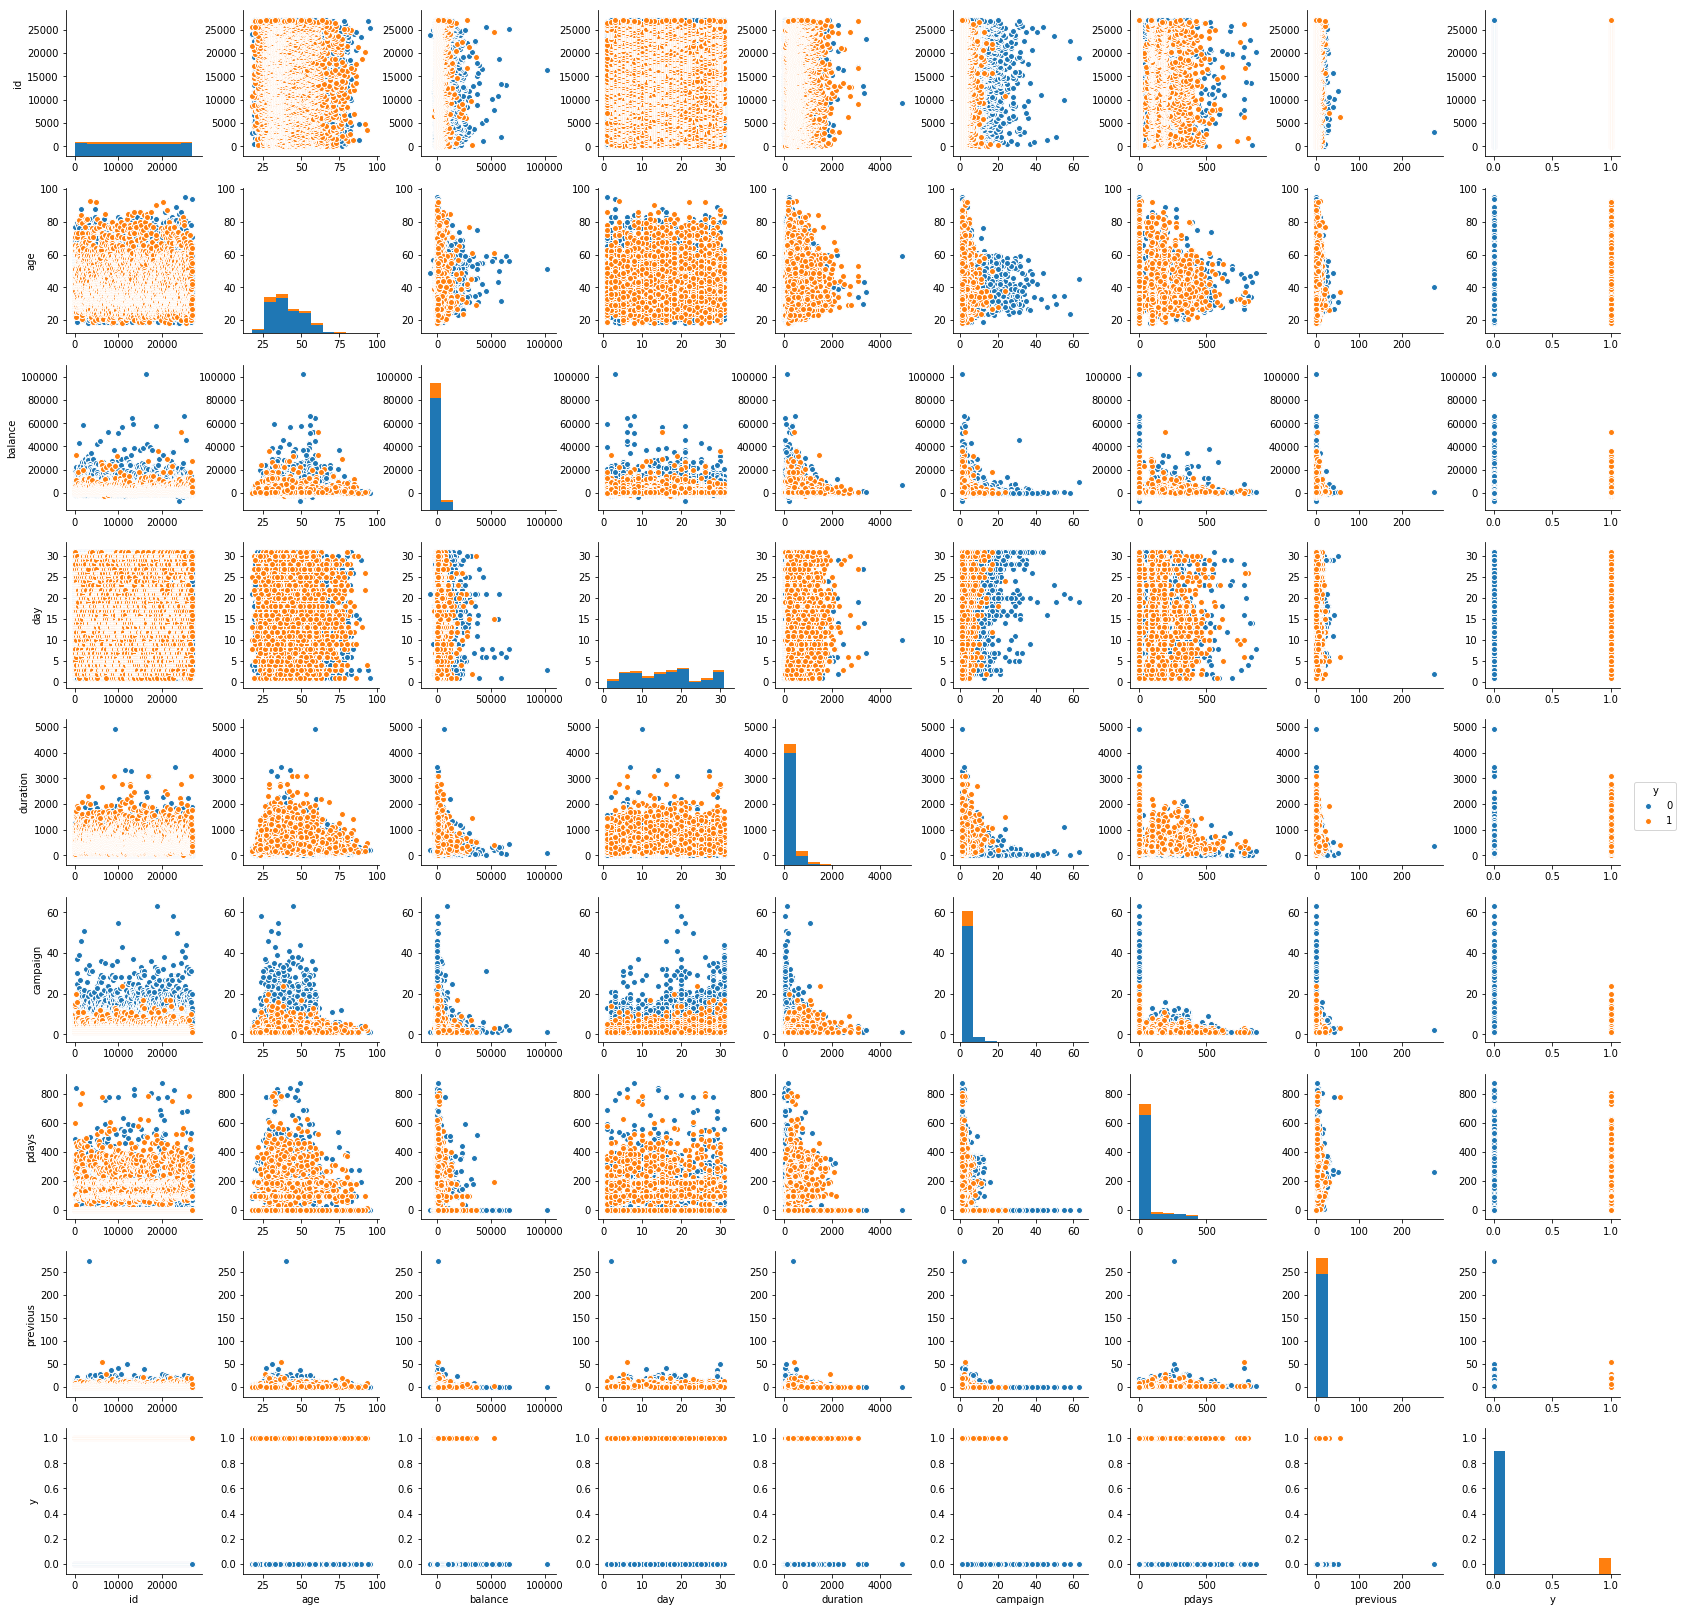

In [6]:
sns.pairplot(train, hue='y')

In [21]:
#dummy setting
dummy_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
dummy_prefix = {dc: dc for dc in dummy_cols}

#get_dummies for train data
train_tmp = pd.merge(train, pd.get_dummies(train[dummy_cols], prefix=dummy_prefix, prefix_sep='_'), left_index=True, right_index=True)
train_tmp = train_tmp.drop(dummy_cols, axis=1)
train_tmp['default'] = train_tmp['default'].map({'no': 0, 'yes': 1})
train_tmp['housing'] = train_tmp['housing'].map({'no': 0, 'yes': 1})
train_tmp['loan'] = train_tmp['loan'].map({'no': 0, 'yes': 1})

#get_dummies for test data
test_tmp = pd.merge(test, pd.get_dummies(test[dummy_cols], prefix=dummy_prefix, prefix_sep='_'), left_index=True, right_index=True)
test_tmp = test_tmp.drop(dummy_cols, axis=1)
test_tmp['default'] = test_tmp['default'].map({'no': 0, 'yes': 1})
test_tmp['housing'] = test_tmp['housing'].map({'no': 0, 'yes': 1})
test_tmp['loan'] = test_tmp['loan'].map({'no': 0, 'yes': 1})

In [22]:
train_tmp.columns

Index(['id', 'age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [29]:
drop_cols = ['id', 'day', 'duration', 'job_unknown', 'marital_single', 'education_unknown', 'poutcome_unknown', 'month_dec']
X_train = train_tmp.drop(drop_cols, axis=1).drop('y', axis=1)
y_train = train_tmp['y']
X_test = test_tmp.drop(drop_cols, axis=1)

#standardization
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

X_test

,age,default,balance,housing,loan,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,30,0,1028,0,0,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39,0,426,0,0,1,-1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,38,0,-572,1,1,24,-1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,34,0,-476,1,0,4,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,37,0,62,0,0,2,-1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,43,0,574,1,0,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,54,0,324,1,0,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,41,0,121,1,0,6,176,5,0,1,...,0,0,0,1,0,0,0,0,1,0
8,52,0,1466,0,1,1,-1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,32,0,6217,1,1,2,181,2,0,0,...,0,0,0,0,1,0,0,1,0,0


In [30]:
#logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

#logistic regression model(standardization)
clf_std = LogisticRegression()
clf_std.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
print('coefficient = ', clf.coef_)
print('intercept = ', clf.intercept_)
print('coefficient_std = ', clf_std.coef_)
print('intercept_std = ', clf_std.intercept_)

coefficient =  [[-1.90518640e-03 -7.74825778e-03  1.37023807e-05 -5.27165295e-01
  -3.73788888e-01 -9.45083199e-02  6.30832630e-04  1.25218638e-02
  -1.16346859e-01 -1.94609419e-01 -1.67641932e-01 -2.58475502e-01
  -9.55482159e-02  4.37311266e-01 -1.13118356e-01 -2.34484539e-01
   2.49521508e-01 -1.93077595e-01  3.59703065e-02 -1.13109574e-01
  -2.80391266e-01 -4.04806177e-01 -1.69418754e-01 -7.35161190e-02
   2.68890086e-01  4.85195606e-02 -1.10592347e+00  6.97087356e-02
  -7.37990353e-01 -3.34759623e-01 -8.41881431e-01 -6.60262862e-01
   2.00988439e-01  9.25259783e-01 -3.55071672e-01 -7.83083602e-01
   6.92741392e-01  6.14735239e-01 -2.65467877e-01 -2.04526500e-01
   2.03386949e+00]]
intercept =  [-0.78851383]
coefficient_std =  [[-4.84748650e-03  1.52397550e-02  4.09411265e-02 -2.63470576e-01
  -1.35270062e-01 -3.01974826e-01 -2.44592436e-02  1.87843873e-02
   9.87277207e-02  8.63047790e-02  4.72640265e-02  1.13310871e-02
   1.24014001e-01  1.63622518e-01  5.65569846e-02  6.19154074

In [32]:
#prediction
y_pred = clf.predict(X_test)
y_pred

#prediction(standardization)
y_pred_std = clf_std.predict(X_test_std)
y_pred_std

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
#prediction of probabbilities
probs = clf.predict_proba(X_test)
probs = pd.DataFrame(probs, columns=['prob_0', 'prob_1'])
probs

#prediction of probabbilities(standardization)
probs_std = clf_std.predict_proba(X_test_std)
probs_std = pd.DataFrame(probs_std, columns=['prob_0', 'prob_1'])
probs_std

,prob_0,prob_1
0,0.791217,0.208783
1,0.886907,0.113093
2,0.995211,0.004789
3,0.974135,0.025865
4,0.903243,0.096757
5,0.921767,0.078233
6,0.924150,0.075850
7,0.929824,0.070176
8,0.945149,0.054851
9,0.950433,0.049567


In [34]:
#output file for submition
data = pd.concat([test, probs], axis=1)
data = data[['id', 'prob_1']]
data.to_csv('data/1/submit_logistic_2.csv', index=None, header=None, encoding='sjis')

#output file for submition(standardization)
data_std = pd.concat([test, probs_std], axis=1)
data_std = data_std[['id', 'prob_1']]
data_std.to_csv('data/1/submit_logistic_standardization_2.csv', index=None, header=None, encoding='sjis')

In [15]:
print(pd.DataFrame(X_train.columns, clf_std.coef_[0]))

                             0
 0.002680                  age
-0.000669              default
 0.049938              balance
-0.292460              housing
-0.168124                 loan
-0.362884             campaign
 0.015535                pdays
 0.020242             previous
 0.106168           job_admin.
 0.069721      job_blue-collar
 0.027372     job_entrepreneur
 0.008176        job_housemaid
 0.106187       job_management
 0.182541          job_retired
 0.041183    job_self-employed
 0.047393         job_services
 0.115717          job_student
 0.051934       job_technician
 0.076600       job_unemployed
-0.051789     marital_divorced
-0.157174      marital_married
-0.118310    education_primary
-0.065367  education_secondary
-0.008102   education_tertiary
 0.210315     contact_cellular
 0.072702    contact_telephone
-0.260108      contact_unknown
 0.036275     poutcome_failure
 0.059385       poutcome_other
 0.411811     poutcome_success


In [ ]:
#SVM
clf = svm.SVC(probability=True)
clf.fit(X_train, y_train)

#prediction of probabbilities
probs = clf.predict_proba(X_test)
probs = pd.DataFrame(probs, columns=['prob_0', 'prob_1'])
probs

In [ ]:
#output file for submition
data = pd.concat([test, probs], axis=1)
data = data[['id', 'prob_1']]
data.to_csv('data/1/submit_svm_1.csv', index=None, header=None, encoding='sjis')

In [ ]:
#Random Forest
forest = RandomForestClassifier(min_samples_leaf=3, random_state=0)
forest.fit(X_train, y_train)
probs = clf.predict_proba(X_test)
probs = pd.DataFrame(probs, columns=['prob_0', 'prob_1'])
probs

In [ ]:
#output file for submition
data = pd.concat([test, probs], axis=1)
data = data[['id', 'prob_1']]
data.to_csv('data/1/submit_randomforest_1.csv', index=None, header=None, encoding='sjis')

In [48]:
#select feature
rfe = RFE(clf_std, 15) #ランキングトップ17の説明変数を選択する
rfe = rfe.fit(X_train_std, y_train)
 
#RFEの結果から有効な説明変数を絞り込む
col_name = pd.DataFrame(X_train.columns).rename(columns = {0:'columns'})
target = pd.DataFrame(rfe.support_).rename(columns = {0:'target'})
all_features = pd.concat([col_name, target], axis = 1)
selected_features = all_features[all_features['target'] == True]
 
print(selected_features)

             columns  target
3            housing    True
4               loan    True
5           campaign    True
20   marital_married    True
24  contact_cellular    True
26   contact_unknown    True
27         month_apr    True
28         month_aug    True
29         month_feb    True
30         month_jan    True
31         month_jul    True
32         month_jun    True
34         month_may    True
35         month_nov    True
40  poutcome_success    True


In [49]:
X_train_selected = X_train[selected_features['columns']]
X_test_selected = X_test[selected_features['columns']]
clf_selected = LogisticRegression()
clf_selected.fit(X_train_selected, y_train)

print('coefficient = ', clf_selected.coef_)
print('intercept = ', clf_selected.intercept_)

y_pred_selected = clf_selected.predict(X_test_selected)

probs_selected = clf_selected.predict_proba(X_test_selected)
probs_selected = pd.DataFrame(probs_selected, columns=['prob_0', 'prob_1'])

data_selected = pd.concat([test, probs_selected], axis=1)
data_selected = data_selected[['id', 'prob_1']]
data_selected.to_csv('data/1/submit_logistic_4.csv', index=None, header=None, encoding='sjis')

coefficient =  [[-0.6053148  -0.40643961 -0.09810325 -0.29071638  0.20366315 -1.19315238
  -0.7869681  -1.5431275  -1.16440955 -1.85192028 -1.5059658  -0.65324355
  -1.2194615  -1.62619123  2.15974521]]
intercept =  [-0.17282408]
